# GCN in a transductive setting for Node betweenness
This notebook shows how a GCN/GraphSAGE model is trained to compute Node betweenness centrality on different graphs

# 1. Codebase

In [1]:
%load_ext autoreload
%autoreload 2
import torch
from torch.nn import *
from TFM_edge_betweenness_model import META1
from TFM_node_betweenness_training import *

# 2. Selected graphs for HP search

Graphs with higher number of node betweenness.

Analysis of vis_../datasets/precomputed-pytorchg-betweenness_old/KarateClub_1_eb.pickle Dataset-----------------------------------
number of graphs in the dataset:  3
num classes:  1
num features:  1
<class 'torch_geometric.data.data.Data'>
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77

Draw
0.02525252476334572
tensor(0.0253)


/home/pau/.pyenv/versions/3.6.7/envs/gnn-pytorch/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


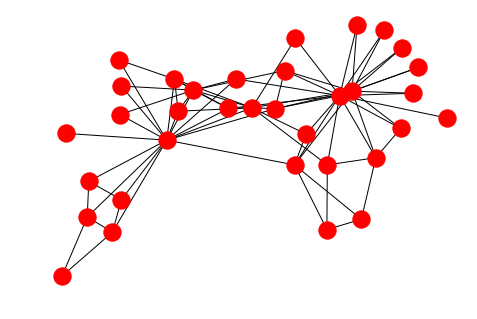

In [2]:
dname='../datasets/precomputed-pytorchg-betweenness_old/KarateClub_1_eb.pickle'
dataset = loadDataset(collection='MyOwnDataset2',name=dname)
inspectGraphDataset(dataset, 'vis_'+dname)
data = dataset.data
#data.x = torch.ones(len(list(set([n.item() for n in data.edge_index[0]]))))
# data.x is wrong, lately it will be setup to len(nodes) torch.ones(len(nodes))
# transform back to NX

In [3]:
with open('temp/temp_to_nx.txt','w') as f:
    edge_neighbors = data.edge_index.tolist()
    for j in range(len(edge_neighbors[0])):
        f.write(str(edge_neighbors[0][j]) + ' ' + str(edge_neighbors[1][j]) + '\n')
            
    
    
g = nx.read_edgelist('temp/temp_to_nx.txt', nodetype=int)
print()
print("Read graph")
print(g.nodes())
print()
print()
print(g.edges())


Read graph
[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 11, 12, 13, 17, 19, 21, 31, 30, 9, 27, 28, 32, 16, 33, 24, 25, 23, 14, 15, 18, 20, 22, 29, 26]


[(0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 10), (0, 11), (0, 12), (0, 13), (0, 17), (0, 19), (0, 21), (0, 31), (1, 2), (1, 3), (1, 7), (1, 13), (1, 17), (1, 19), (1, 21), (1, 30), (2, 3), (2, 7), (2, 8), (2, 9), (2, 13), (2, 27), (2, 28), (2, 32), (3, 7), (3, 12), (3, 13), (4, 6), (4, 10), (5, 6), (5, 10), (5, 16), (6, 16), (8, 30), (8, 32), (8, 33), (13, 33), (19, 33), (31, 24), (31, 25), (31, 28), (31, 32), (31, 33), (30, 32), (30, 33), (9, 33), (27, 23), (27, 24), (27, 33), (28, 33), (32, 14), (32, 15), (32, 18), (32, 20), (32, 22), (32, 23), (32, 29), (32, 33), (33, 14), (33, 15), (33, 18), (33, 20), (33, 22), (33, 23), (33, 26), (33, 29), (24, 25), (25, 23), (23, 29), (29, 26)]


In [4]:
#g = pyTorchGeometricDatasetToNx(data)
# compute edge and node betweenness
eb = nx.edge_betweenness_centrality(g,normalized=True)
nb = nx.betweenness_centrality(g,normalized=True)
pr = nx.pagerank(g)
# save them back to the data instance

In [5]:
pr

{0: 0.09700181758983709,
 1: 0.05287839103742701,
 2: 0.057078423047636745,
 3: 0.03586064322306479,
 4: 0.021979406974834498,
 5: 0.02911334166344221,
 6: 0.029113341663442212,
 7: 0.024490758039509182,
 8: 0.029765339186167035,
 10: 0.0219794069748345,
 11: 0.009564916863537148,
 12: 0.014645186487916191,
 13: 0.029536314977202986,
 17: 0.014558859774243493,
 19: 0.019604416711937297,
 21: 0.014558859774243493,
 31: 0.03715663592267942,
 30: 0.02458933653429248,
 9: 0.014308950284462801,
 27: 0.025638803528350497,
 28: 0.01957296050943854,
 32: 0.07169213006588289,
 16: 0.016785378110253487,
 33: 0.10091791674871213,
 24: 0.021075455001162945,
 25: 0.02100562817474579,
 23: 0.03152091531163228,
 14: 0.014535161524273827,
 15: 0.014535161524273827,
 18: 0.014535161524273827,
 20: 0.014535161524273827,
 22: 0.014535161524273827,
 29: 0.02628726283711208,
 26: 0.015043395360629756}

In [13]:
data.x=torch.ones(len(list(nb.keys())))
data.y=torch.ones(len(list(nb.keys())))
for k,v in nb.items():
    data.y[k]=v
nb

{0: 0.4376352813852815,
 1: 0.05393668831168831,
 2: 0.14365680615680618,
 3: 0.011909271284271283,
 4: 0.0006313131313131313,
 5: 0.02998737373737374,
 6: 0.029987373737373736,
 7: 0.0,
 8: 0.05592682780182782,
 10: 0.0006313131313131313,
 11: 0.0,
 12: 0.0,
 13: 0.045863395863395856,
 17: 0.0,
 19: 0.03247504810004811,
 21: 0.0,
 31: 0.13827561327561327,
 30: 0.014411976911976905,
 9: 0.0008477633477633478,
 27: 0.022333453583453577,
 28: 0.0017947330447330447,
 32: 0.14524711399711404,
 16: 0.0,
 33: 0.30407497594997596,
 24: 0.0022095959595959595,
 25: 0.0038404882154882154,
 23: 0.017613636363636363,
 14: 0.0,
 15: 0.0,
 18: 0.0,
 20: 0.0,
 22: 0.0,
 29: 0.0029220779220779218,
 26: 0.0}

In [26]:
data.x = data.x.reshape(-1,1)
data.x

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]])

In [27]:
data.y = data.y.reshape(-1,1)
data.y

tensor([[0.4376],
        [0.0539],
        [0.1437],
        [0.0119],
        [0.0006],
        [0.0300],
        [0.0300],
        [0.0000],
        [0.0559],
        [0.0008],
        [0.0006],
        [0.0000],
        [0.0000],
        [0.0459],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0325],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0176],
        [0.0022],
        [0.0038],
        [0.0000],
        [0.0223],
        [0.0018],
        [0.0029],
        [0.0144],
        [0.1383],
        [0.1452],
        [0.3041]])

In [28]:
data.edge_attr = torch.ones(len(data.edge_index[0]),1)
data.edge_attr 

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
      

In [30]:
len(data.edge_attr)

78

In [31]:
len(data.x)

34

# 3 Manual training v1

data.x = [1]

In [41]:
%load_ext autoreload
%autoreload 2
import torch
from torch.nn import *
from TFM_edge_betweenness_model import *
from TFM_node_betweenness_training import *
from TFM_node_betweenness_models import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


array([0.0110453, 0.0110453, 0.0110453, 0.0110453, 0.0110453, 0.0110453,
       0.0110453, 0.0110453, 0.0110453, 0.0110453, 0.0110453, 0.0110453,
       0.0110453, 0.0110453, 0.0110453, 0.0110453, 0.0110453],
      dtype=float32)
(17,)


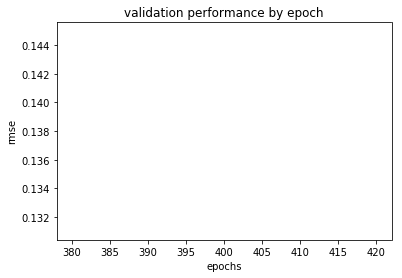

,GTavg,GTmax,GTmin,PREDavg,PREDmax,PREDmin,batch_size,dataset,epochs,hyperparams,nrmse,seed,time
META2-_epochs=400,0.0769644,0.437635,0,0.0110453,0.0110453,0.0110453,1,,400,_epochs=400,0.138,15,1.577


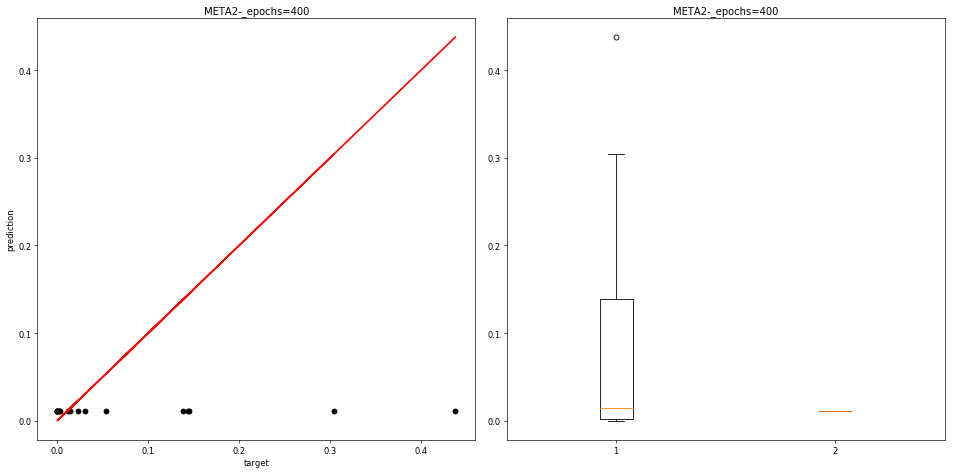

In [39]:
res_dict={'tables':{}, 'scatterplots':{}}
dataset = data
Net = META2(num_edges=len(data.edge_attr))
manual_training(dataset,Net,epochs=400,res_dict=res_dict,seed=15)
#print(res_dict)
reporting(res_dict)

array([ 0.01796641,  0.0179341 ,  0.01789819,  0.0176509 ,  0.01478325,
        0.01377427,  0.00337513, -0.00206975,  0.00337513, -0.00112012,
        0.01782452,  0.01661964,  0.01109911,  0.01742292,  0.01790926,
        0.01751291,  0.01339994], dtype=float32)
(17,)


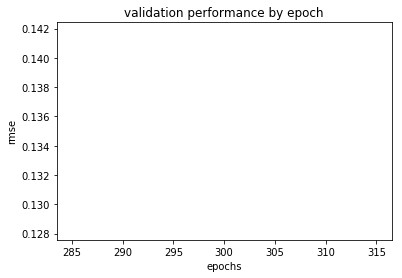

,GTavg,GTmax,GTmin,PREDavg,PREDmax,PREDmin,batch_size,dataset,epochs,hyperparams,nrmse,seed,time
Net1-d1=16_epochs=300,0.0769644,0.437635,0,0.012668,0.0179664,-0.00206975,1,,300,d1=16_epochs=300,0.135,15,0.773


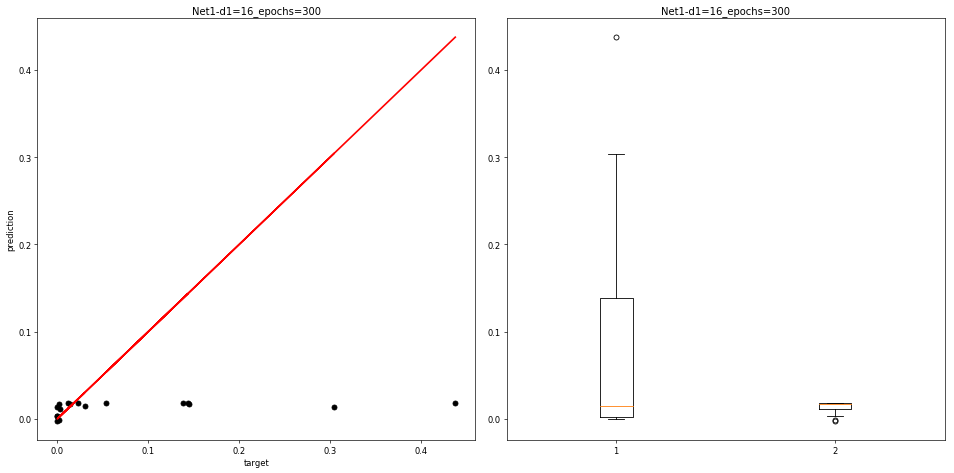

In [46]:
res_dict={'tables':{}, 'scatterplots':{}}
dataset = data
Net = Net1()
manual_training(dataset,Net,epochs=300,res_dict=res_dict,seed=15)
#print(res_dict)
reporting(res_dict)

array([ 0.01820223,  0.02954995,  0.02469717,  0.03854899,  0.03546272,
        0.02036886,  0.01820223,  0.01820223,  0.01820223,  0.01820223,
        0.10509589, -0.18892936,  0.02921216, -0.04984375,  0.03210654,
        0.01646237,  0.19076608], dtype=float32)
(17,)


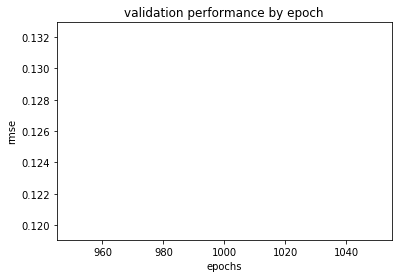

,GTavg,GTmax,GTmin,PREDavg,PREDmax,PREDmin,batch_size,dataset,epochs,hyperparams,nrmse,seed,time
Net7-d1=90_d2=80_d3=50_dK=10_num_layers=4_epochs=1000,0.0705309,0.437635,0,0.0220299,0.190766,-0.188929,1,,1000,d1=90_d2=80_d3=50_dK=10_num_layers=4_epochs=1000,0.126,16,18.072


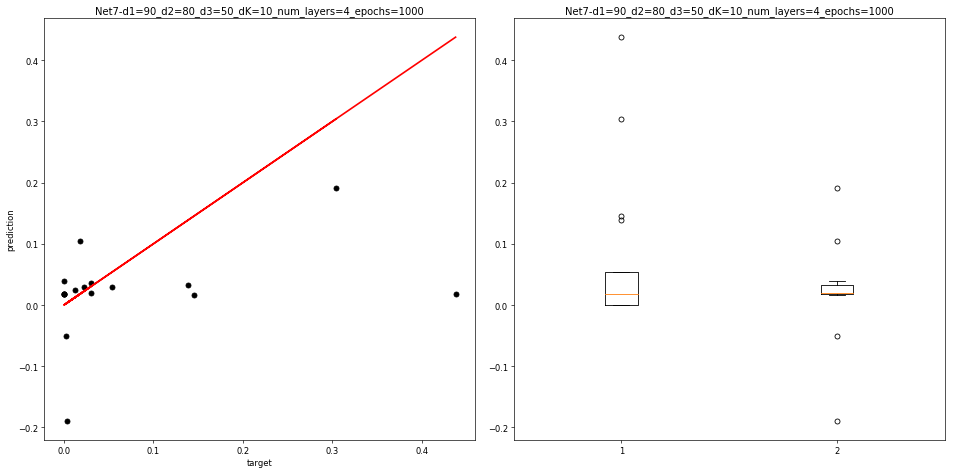

In [71]:
res_dict={'tables':{}, 'scatterplots':{}}
dataset = data
Net = Net7()
manual_training(dataset,Net,epochs=1000,res_dict=res_dict,seed=16,
               K=20,epochs=200,laye)
#print(res_dict)
reporting(res_dict)

array([0.01351692, 0.01938146, 0.03880985, 0.02820874, 0.02497094,
       0.0199625 , 0.01351692, 0.01351692, 0.01351692, 0.01351692,
       0.06387171, 0.03134241, 0.0312617 , 0.04287934, 0.02172053,
       0.03686394, 0.02423064], dtype=float32)
(17,)


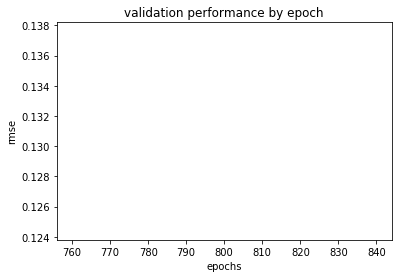

,GTavg,GTmax,GTmin,PREDavg,PREDmax,PREDmin,batch_size,dataset,epochs,hyperparams,nrmse,seed,time
Net8-d1=90_d2=80_d3=50_dK=10_num_layers=4_epochs=800,0.0705309,0.437635,0,0.0265346,0.0638717,0.0135169,1,,800,d1=90_d2=80_d3=50_dK=10_num_layers=4_epochs=800,0.131,16,14.01


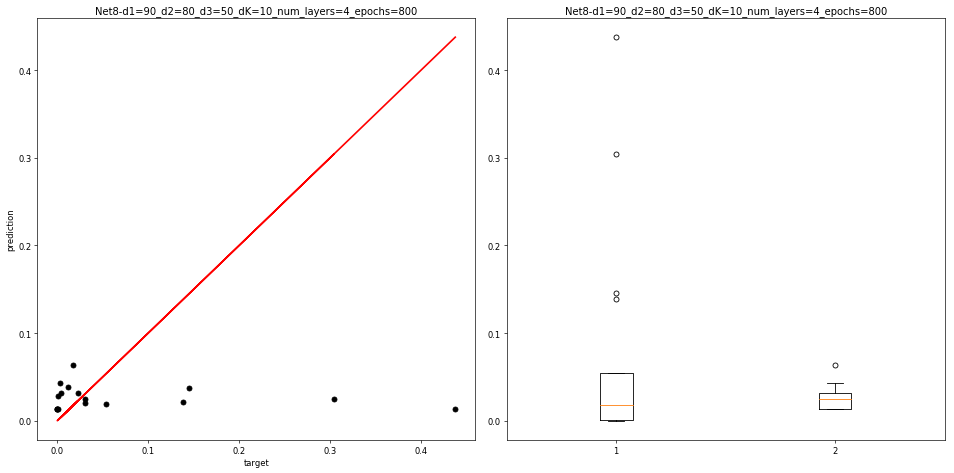

In [73]:
res_dict={'tables':{}, 'scatterplots':{}}
dataset = data
Net = Net8()
manual_training(dataset,Net,epochs=800,res_dict=res_dict,seed=16)
#print(res_dict)
reporting(res_dict)